In [1]:
!ls outputs/145b5w3j/*.pt

outputs/145b5w3j/save_4999.pt outputs/145b5w3j/save_9999.pt


In [2]:
import torchvision.transforms as transforms
import torchvision

transform = transforms.Compose([transforms.ToTensor()])
training_images = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

/Users/johnmorris/miniforge3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
import torch
from models import Encoder, Decoder, CategoricalVAE

batch_size = 1
train_dataset = torch.utils.data.DataLoader(
        dataset=training_images,
        batch_size=batch_size,
        shuffle=True
    )

image_shape = next(iter(train_dataset))[0][0].shape # [1, 28, 28]
K = 10 # number of classes
N = 30 # number of categorical distributions
encoder = Encoder(N, K, image_shape)
decoder = Decoder(N, K, image_shape)
model = CategoricalVAE(encoder, decoder)

state_dict = torch.load('outputs/145b5w3j/save_9999.pt')
model.load_state_dict(state_dict)

N = 30 and K = 10


<All keys matched successfully>

In [92]:
batch = next(iter(train_dataset))
x, labels = batch
print(x.shape)

torch.Size([1, 1, 28, 28])


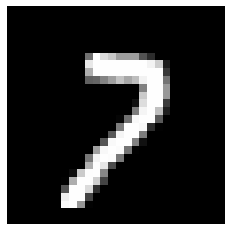

In [97]:
import matplotlib.pyplot as plt
plt.imshow(x.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

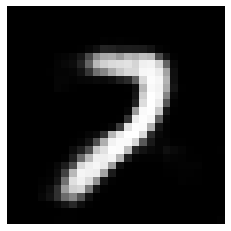

In [96]:
import matplotlib.pyplot as plt
with torch.no_grad():
    phi, x_hat = model(x, temperature=1.0)
plt.imshow(x_hat.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

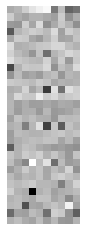

In [98]:
plt.imshow(phi.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

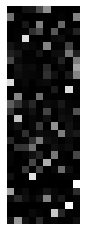

In [102]:
from models import gumbel_softmax
z_given_x = gumbel_softmax(phi, temperature=1.0, hard=False, batch=True)
plt.imshow(z_given_x.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

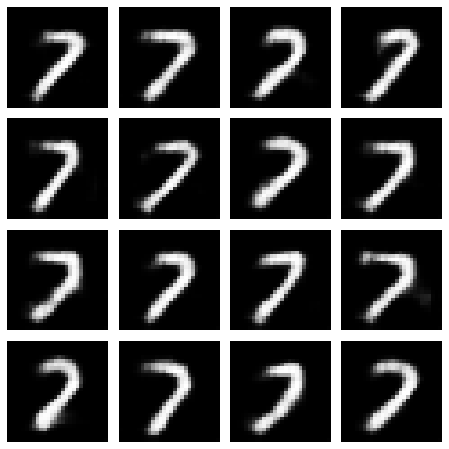

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.15,  # pad between axes in inch.
                 )

for ax in grid:
    # Iterating over the grid returns the Axes.
    z_given_x = gumbel_softmax(phi, temperature=5., hard=True, batch=True)
    with torch.no_grad():
        x_hat = model.decoder(z_given_x)
    ax.imshow(x_hat.squeeze(), cmap='gray')
    ax.axis('off')

plt.show()